In [1]:
import numpy as np  
import matplotlib.pyplot as plt  

# 插值方法

## Lagrange插值、Newton插值

### 函数定义以及实现

#### Lagrange插值

In [2]:
# Lagrange 
def lagrange_interpolation(x, y, x0):  
    n = len(x)  
    L = 0  # Lagrange插值函数
    for k in range(n):  
        lk = 1  
        for i in range(n):  
            if i != k:  
                lk *= (x0 - x[i]) / (x[k] - x[i])  # Lagrange基函数，直接将x0代入
        L += lk * y[k]  
    return L  

#### Newton插值  

In [3]:
# Newton 
def newton_interpolation(x, y, x0):  
    n = len(x)  
    # 构建差商表
    f = np.zeros((n, n))  
    f[:, 0] = y  # 初始化第一列为y值，构造n-1阶差商
    for j in range(1, n):
        for i in range(j, n):
            f[i][j] = (f[i][j-1] - f[i-1][j-1]) / (x[i] - x[i-j]) 
            
    # 使用差商表计算N(x) = Σ (f[x0...xi] * wi(x))，使用秦九韶算法
    N = f[n-1][n-1] # 最后一个元素是插值多项式的常数项  
    for j in range(n-2, -1, -1): # 从最高次幂开始到最低次幂  
        N = N * (x0 - x[j]) + f[j][j]  
    return N 

### 正常数据组、龙格现象数据组

#### 正常数据组

y_lagrage
 [-0.9163, -0.8280759641432182, -0.7471358237247057, -0.6722753161724022, -0.6026101663980453, -0.5374688694505195, -0.4763165611794779, -0.41870500177464504, -0.36424369704622667, -0.3125871823118461, -0.2634334937554167, -0.21652885212338055, -0.1716735836237239, -0.1287243028931917, -0.08758738289811835, -0.048198736634294574, -0.010484935491287423, 0.02569931085336625, 0.060662288144675405, 0.095]
y_newton
 [-0.9163, -0.8280759641432179, -0.7471358237247054, -0.6722753161724022, -0.6026101663980451, -0.5374688694505196, -0.47631656117947796, -0.41870500177464487, -0.3642436970462267, -0.3125871823118461, -0.2634334937554167, -0.21652885212338047, -0.17167358362372387, -0.1287243028931917, -0.0875873828981183, -0.04819873663429464, -0.010484935491287484, 0.025699310853366297, 0.06066228814467545, 0.09500000000000008]


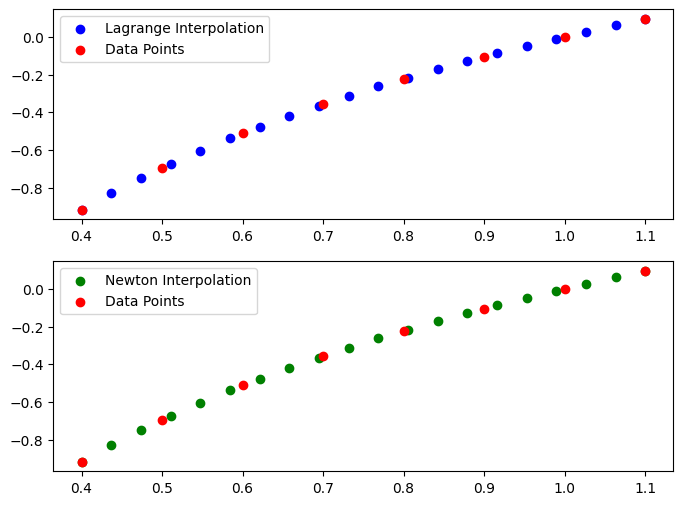

In [4]:
x = np.array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1])  
y = np.array([-0.9163, -0.6931, -0.5108, -0.3567, -0.2231, -0.105, 0, 0.095])  

# Lagrange、Newton插值计算 
x0 = np.linspace(x[0], x[-1], 20)  # 将x取值区间分段  
y_lagrange = [lagrange_interpolation(x, y, xi) for xi in x0]  # Lagrange
y_newton = [newton_interpolation(x, y, xi) for xi in x0]  # Newton  
#插值数据对比
# print('data\n', x0)
print('y_lagrage\n',y_lagrange)
print('y_newton\n',y_newton)

# 绘图
plt.figure(figsize=(8, 6)) 
plt.subplot(2,1,1)
# plt.plot(x0, y_lagrange, label='Lagrange Interpolation') # Lagrange
plt.scatter(x0, y_lagrange, color = 'blue', label = 'Lagrange Interpolation')
plt.scatter(x, y, color='red', label='Data Points')  # 显示原始数据点  
plt.legend()  # 显示图例  

plt.subplot(2,1,2)
# plt.plot(x0, y_newton, label='Newton Interpolation') # Newton 
plt.scatter(x0, y_newton, color = 'green', label = 'Newton Interpolation')
plt.scatter(x, y, color='red', label='Data Points')  # 显示原始数据点  
plt.legend()  # 显示图例  
plt.show()

#### 龙格现象数据组 1/(1+x^2)

y_runge
 [0.038461538461538464, 0.047058823529411764, 0.058823529411764705, 0.07547169811320754, 0.1, 0.13793103448275862, 0.2, 0.3076923076923077, 0.5, 0.8, 1.0, 0.8, 0.5, 0.3076923076923077, 0.2, 0.13793103448275862, 0.1, 0.07547169811320754, 0.058823529411764705, 0.047058823529411764, 0.038461538461538464]
y_lagrange
 [0.038461538461538464, 1.5926322111523206, -0.27272270783626307, 0.16698208296503828, 0.07643453531074544, 0.16445654705285678, 0.2204550716504017, 0.3708085551944563, 0.6127788507890205, 0.9366063228266007, 0.9366063228266015, 0.6127788507890213, 0.370808555194456, 0.22045507165040162, 0.16445654705285723, 0.0764345353107444, 0.16698208296503844, -0.2727227078362566, 1.592632211152345, 0.038461538461538464]
y_newton
 [0.038461538461538464, 1.5926322111523006, -0.2727227078362584, 0.16698208296503875, 0.07643453531074487, 0.16445654705285714, 0.22045507165040168, 0.3708085551944561, 0.6127788507890204, 0.9366063228266008, 0.9366063228266014, 0.6127788507890215, 0.37080

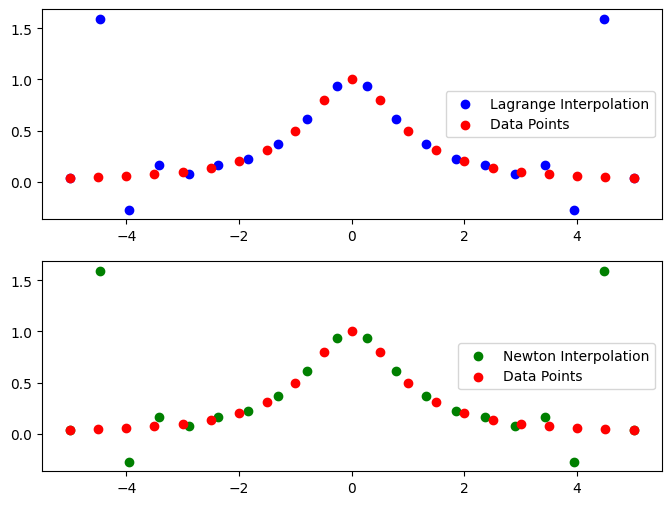

In [5]:
n = 20 
x_runge = [-5 + 10/n * i  for i in range(n+1)] # -5到5分为n+1段
y_runge = [1/(1+i*i) for i in x_runge] 

# Lagrange、Newton插值计算 
x0 = np.linspace(x_runge[0], x_runge[-1], 20)  # 将x取值区间分段  
y_lagrange = [lagrange_interpolation(x_runge, y_runge, xi) for xi in x0]  # Lagrange
y_newton = [newton_interpolation(x_runge, y_runge, xi) for xi in x0]  # Newton  
#插值数据对比
print('y_runge\n',y_runge) # 插值节点
print('y_lagrange\n',y_lagrange)
print('y_newton\n',y_newton)

plt.figure(figsize=(8, 6)) 
plt.subplot(2,1,1)
plt.scatter(x0, y_lagrange,color='blue', label='Lagrange Interpolation') # Lagrange
plt.scatter(x_runge, y_runge, color='red', label='Data Points')  # 显示原始数据点  
plt.legend()  # 显示图例  
plt.subplot(2,1,2)
plt.scatter(x0, y_newton,color='green',  label='Newton Interpolation') # Newton 
plt.scatter(x_runge, y_runge, color='red', label='Data Points')  # 显示原始数据点  
plt.legend()  # 显示图例  
plt.show()

# 数值积分与微分

## 复化梯形公式（变步长算法）

### 不使用递推公式

In [5]:
# 被积函数f(x)
def f(x):
    return x**2 + 2*x

# 复化梯形公式
def compound(a, b, N):
    h = (b - a) / N  # 初始步长  
    x = np.linspace(a, b, N+1)  # 在[a, b]之间均匀地取N+1个点  
    y = [f(i) for i in x] 
    integral = h/2 * (y[0] + 2*np.sum(y[1:-2]) +y[-1])  # 使用复化梯形公式计算积分  
    print('初值: '+str(integral))
    # 变步长迭代  
    cnt = 1
    while True:  
        N *= 2  # 区间加倍
        h /= 2 # 步长减半
        x = np.linspace(a, b, N+1)  
        y = [f(i) for i in x] 
        new_integral = h/2 * (y[0] + 2*np.sum(y[1:-2]) +y[-1])  # 使用复化梯形公式计算积分
        if abs(new_integral - integral) < 1e-6:  # T2 - T1 精度达到要求
            break  
        integral = new_integral  # 更新积分值 
        print(f'迭代{cnt}次: '+str(integral)) # 输出每次迭代结果 
        cnt += 1
    return integral  

In [6]:
# 计算 f(x) = x^2 + 2x 在[1,3]上的定积分
a = 1
b = 3
N = 2 # 区间分段数
print(compound(a,b,N))

初值: 9.0
迭代1次: 11.125
迭代2次: 13.421875
迭代3次: 14.919921875
迭代4次: 15.761474609375
迭代5次: 16.206024169921875
迭代6次: 16.434322357177734
迭代7次: 16.549987316131592
迭代8次: 16.608200013637543
迭代9次: 16.637401573359966
迭代10次: 16.652026175521314
迭代11次: 16.659344434621744
迭代12次: 16.663005053982488
迭代13次: 16.66483573615369
迭代14次: 16.665751170366775
迭代15次: 16.666208910755785
迭代16次: 16.66643778677098
迭代17次: 16.66655222623376
迭代18次: 16.66660944632895
迭代19次: 16.66663805646749
迭代20次: 16.6666523615595
迭代21次: 16.666659514111302
迭代22次: 16.666663090388326
迭代23次: 16.666664878527673
16.666664878527673


### 使用递推公式

In [17]:
# 被积函数f(x)
def f(x):
    return x**2 + 2*x

# 复化梯形公式
def compound(a, b, N):
    h = (b - a) / N  # 初始步长  
    x = np.linspace(a, b, N+1)  # 在[a, b]之间均匀地取N+1个点  
    y = [f(i) for i in x] 
    integral = h/2 * (y[0] + 2*np.sum(y[1:-2]) +y[-1])  # 使用复化梯形公式计算积分T  
    print('初值: '+str(integral))
    # 变步长迭代  
    cnt = 1
    while True:  
        N *= 2  # 区间加倍
        # new_x = np.linspace(a, b, N+1)  
        new_y = [f(i + 1/2) for i in x[:-1]] # 新增加的x对应的y值
        new_integral = 1/2 * integral + h/2 * np.sum(new_y)  
        if abs(new_integral - integral) < 1e-6:  # T2 - T1 精度达到要求
            break  
        integral = new_integral  # 更新积分值 
        print(f'迭代{cnt}次: '+str(integral)) # 输出每次迭代结果 
        cnt +=1
        h/=2
    return integral  

In [18]:
# 计算 f(x) = x^2 + 2x 在[1,3]上的定积分
a = 1
b = 3
N = 2 # 区间分段数
print(compound(a,b,N))

初值: 9.0
迭代1次: 12.75
迭代2次: 16.25
迭代3次: 18.84375
迭代4次: 20.5703125
迭代5次: 21.650390625
迭代6次: 22.29931640625
迭代7次: 22.6783447265625
迭代8次: 22.895172119140625
迭代9次: 23.017250061035156
迭代10次: 23.08512306213379
迭代11次: 23.122477054595947
迭代12次: 23.142862915992737
迭代13次: 23.15391030907631
迭代14次: 23.159861244261265
迭代15次: 23.163050333037972
迭代16次: 23.164751688484102
迭代17次: 23.16565577185247
迭代18次: 23.16613451638841
迭代19次: 23.166387240089534
迭代20次: 23.166520277658492
迭代21次: 23.166590134302623
迭代22次: 23.166626731554615
迭代23次: 23.166645864645673
迭代24次: 23.16665584842354


KeyboardInterrupt: 

## Romberg积分算法

# 常微分方程初值问题的数值解法

# 方程求根的数值方法

# 线性代数方程组的数值解法